In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
#Importando as bibliotecas
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans # importa a biblioteca Kmeans
import matplotlib.pyplot as plt

In [4]:
#Criar um DataFrame com os dados dos vinhos
dados_vinhos = pd.DataFrame({
    'Teor Alcoólico': [3,4,5,6],
    'Acidez':['muito','pouco','médio','baixo'],
    'pH':[4.3,2.8,4.2,3.9]
})

In [6]:
dados_vinhos =pd.get_dummies(dados_vinhos,columns=['Acidez'])

In [7]:
#Aplicar o algoritimo K-means]
kmeans = KMeans(n_clusters=2) #definindo dos clusters
kmeans.fit(dados_vinhos)

KMeans(n_clusters=2)

In [8]:
#Avaliar o desemprenho do modelo K-means
sse = kmeans.inertia_
print("SSE",sse)

SSE 5.086666666666668


In [9]:
#Visualizar os resultados da segmentação
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

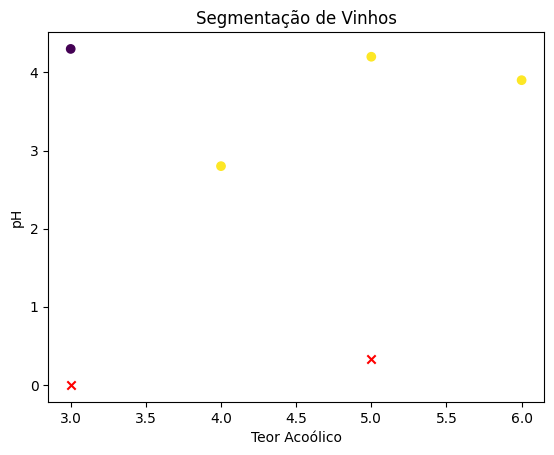

In [10]:
#Plotando um gráfico de dispersão dos vinhos com cores diferentes para cada grupo
plt.scatter(dados_vinhos['Teor Alcoólico'],dados_vinhos['pH'], c=labels)
plt.scatter(centroids[:,0],centroids[:,2],marker='x',color='red')
plt.xlabel('Teor Acoólico')
plt.ylabel('pH')
plt.title('Segmentação de Vinhos')
plt.show()

In [11]:
#Analisar os grupos resultantes
dados_vinhos['Grupo'] = labels
grouped_data = dados_vinhos.groupby('Grupo').mean()
print(grouped_data)

       Teor Alcoólico        pH  Acidez_baixo  Acidez_muito  Acidez_médio  \
Grupo                                                                       
0                 3.0  4.300000      0.000000           1.0      0.000000   
1                 5.0  3.633333      0.333333           0.0      0.333333   

       Acidez_pouco  
Grupo                
0          0.000000  
1          0.333333  
